# TensorFlow Classification

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
diabetes.columns 

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [9]:
import tensorflow as tf

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [11]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

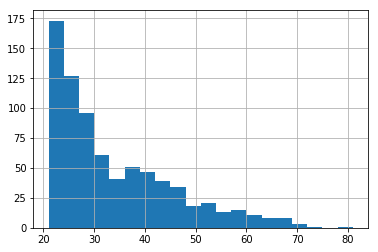

In [13]:
diabetes['Age'].hist(bins=20)

In [14]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [15]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

In [16]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [17]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [18]:
x_data = diabetes.drop('Class',axis=1)

In [19]:
labels = diabetes['Class']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

In [22]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [23]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f10229e7860>, '_keep_checkpoint_every_n_hours': 10000, '_num_worker_replicas': 1, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_id': 0, '_is_chief': True, '_save_checkpoints_steps': None, '_protocol': None, '_evaluation_master': '', '_global_id_in_cluster': 0, '_device_fn': None, '_tf_random_seed': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_save_summary_steps': 100, '_eval_distribute': None, '_service': None, '_model_dir': '/tmp/tmpjr82tuhv', '_save_checkpoints_secs': 600, '_experimental_distribute': None, '_log_step_count_steps': 100, '_task_type': 'worker', '_master': '', '_train_distribute': None}


In [24]:
model.train(input_fn=input_func,steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpjr82tuhv/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 235.236
INFO:tensorflow:loss = 5.1882334, step = 101 (0.429 sec)
INFO:tensorflow:global_step/sec: 350.431
INFO:tensorflow:loss = 3.521082, step = 201 (0.286 sec)
INFO:tensorflow:global_step/sec: 350.453
INFO:tensorflow:loss = 7.0185804, step = 301 (0.286 sec)
INFO:tensorflow:global_step/sec: 349.405
INFO:tensorflow:loss = 4.99638, step = 401 (0.286 sec)
INFO:ten

In [25]:
# Useful link ofr your own data
# https://stackoverflow.com/questions/44664285/what-are-the-contraints-for-tensorflow-scope-names

In [26]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [27]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-14-21:15:10
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpjr82tuhv/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-12-14-21:15:11
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72440946, accuracy_baseline = 0.65748036, auc = 0.78711545, auc_precision_recall = 0.6239363, average_loss = 0.5330149, global_step = 1000, label/mean = 0.34251967, loss = 5.2071457, precision = 0.60240966, prediction/mean = 0.37993267, recall = 0.57471263
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpjr82tuhv/model.ckpt-1000


In [28]:
results

{'accuracy': 0.72440946,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78711545,
 'auc_precision_recall': 0.6239363,
 'average_loss': 0.5330149,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.2071457,
 'precision': 0.60240966,
 'prediction/mean': 0.37993267,
 'recall': 0.57471263}

## Predictions

In [29]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [30]:
predictions = model.predict(pred_input_func)

In [31]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpjr82tuhv/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.53743905], dtype=float32),
  'logits': array([0.15003717], dtype=float32),
  'probabilities': array([0.4625609 , 0.53743905], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6437288], dtype=float32),
  'logits': array([0.59158516], dtype=float32),
  'probabilities': array([0.35627124, 0.6437288 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.40039685], dtype=float32),
  'logits': array([-0.4038118], dtype=float32),
  'probabilities': array([0.5996031 , 0.40039685], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.32724097], dtype=float32),
  'logits': array([-0.7206905], dtype=float32),
  'probabilities': array([0.672759 , 0.3272409], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=obj

# DNN Classifier

In [32]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f10204f37b8>, '_keep_checkpoint_every_n_hours': 10000, '_num_worker_replicas': 1, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_id': 0, '_is_chief': True, '_save_checkpoints_steps': None, '_protocol': None, '_evaluation_master': '', '_global_id_in_cluster': 0, '_device_fn': None, '_tf_random_seed': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_save_summary_steps': 100, '_eval_distribute': None, '_service': None, '_model_dir': '/tmp/tmp9zppvbwp', '_save_checkpoints_secs': 600, '_experimental_distribute': None, '_log_step_count_steps': 100, '_task_type': 'worker', '_master': '', '_train_distribute': None}


In [33]:
# UH OH! AN ERROR. Check out the video to see why and how to fix.
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/feature_column/feature_column.py
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

originally defined at:
  File "/home/aayush/.local/lib/python3.5/site-packages/tensorflow/python/estimator/canned/dnn.py", line 108, in dnn_logit_fn
    name='dnn')
  File "/home/aayush/.local/lib/python3.5/site-packages/tensorflow/python/estimator/canned/dnn.py", line 143, in __init__
    create_scope_now=False)
  File "/home/aayush/.local/lib/python3.5/site-packages/tensorflow/python/feature_column/feature_column.py", line 323, in __init__
    self._name, _internal_input_layer, create_scope_now_=create_scope_now)
  File "/home/aayush/.local/lib/python3.5/site-packages/tensorflow/python/ops/template.py", line 154, in make_template
    **kwargs)


In [34]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [35]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_buckets]

In [36]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [37]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f10204b4f60>, '_keep_checkpoint_every_n_hours': 10000, '_num_worker_replicas': 1, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_id': 0, '_is_chief': True, '_save_checkpoints_steps': None, '_protocol': None, '_evaluation_master': '', '_global_id_in_cluster': 0, '_device_fn': None, '_tf_random_seed': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_save_summary_steps': 100, '_eval_distribute': None, '_service': None, '_model_dir': '/tmp/tmpazn230rl', '_save_checkpoints_secs': 600, '_experimental_distribute': None, '_log_step_count_steps': 100, '_task_type': 'worker', '_master': '', '_train_distribute': None}


In [38]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpazn230rl/model.ckpt.
INFO:tensorflow:loss = 7.546609, step = 1
INFO:tensorflow:global_step/sec: 268.82
INFO:tensorflow:loss = 2.0788844, step = 101 (0.374 sec)
INFO:tensorflow:global_step/sec: 407.102
INFO:tensorflow:loss = 6.276929, step = 201 (0.246 sec)
INFO:tensorflow:global_step/sec: 336.22
INFO:tensorflow:loss = 4.288672, step = 301 (0.299 sec)
INFO:tensorflow:global_step/sec: 211.119
INFO:tensorflow:loss = 5.7322884, step = 401 (0.472 sec)
INFO:tensorflow:global_step/sec: 327.034
INFO:tensorflow:loss = 5.3949738, step = 501 (0.306 sec)
INFO:tensorflow:global_step/sec: 329.609
INFO:tensorflow:loss = 6.4334784, step = 601 (0.304 sec)
INFO:tensorflow:global_step/sec: 315.749
INFO:tensorflow:loss 

In [39]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [41]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-14-21:16:26
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpazn230rl/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-12-14-21:16:27
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7362205, accuracy_baseline = 0.65748036, auc = 0.820669, auc_precision_recall = 0.67037976, average_loss = 0.51020586, global_step = 1000, label/mean = 0.34251967, loss = 4.9843187, precision = 0.59615386, prediction/mean = 0.40933803, recall = 0.7126437
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpazn230rl/model.ckpt-1000


{'accuracy': 0.7362205,
 'accuracy_baseline': 0.65748036,
 'auc': 0.820669,
 'auc_precision_recall': 0.67037976,
 'average_loss': 0.51020586,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 4.9843187,
 'precision': 0.59615386,
 'prediction/mean': 0.40933803,
 'recall': 0.7126437}